# 탐색적 데이터 분석(EDA : Exploratory Data Analysis)

- 통찰을 얻기 위한 데이터 분석의 가장 기본이 되는 방법

- 데이터 분석의 과정 (대략적인 순서)
    1. 데이터 파악 
        - 데이터의 외형적인 내용을 파악하는 단계
      
        - raw data : 분석에 활용된 적이 없는, 또는 정제되지 않은 데이터 ex(kosis) 같은 raw data 가 아닌!( 연산이 들어가지 않은게 raw data 이다 )
        1. 데이터의 출처와 주제 파악
            -  데이터가 어디에서 생성된 것인지
            -  데이터가 어떻게 수집된 것 인지
            -  예) 데이터의 이름, 구성 요소, 출처, 주제 등
            - 신체검사( 병무청, 병원 ) : 검사를 어디서 받느냐에 따라 결과가 달라진다 => 어디서 수집된 자료냐 에따라 신뢰도/목적이 달라지니 잘 알자!
        2. 데이터의 크기 파악
            - 데이터의 크기에 따라서 데이터의 처리방식이 달라지기 때문에
            - 샘플링 : 어떤 자료로부터 일부의 값을 추출하는 행위. 데이터가 너무 크거나 전체 데이터를 활용할 수 없는 경우에 수행
        3. 데이터의 구성 요소(피처) 파악
              - 데이터가 어떻게 구성되어 있는지, 어떤 정보를 담고있는지를 파악하는 아주 중요한 단계
              - 예) 신체검사 데이터의 키, 몸무게, 시력, 청력 등
              - 지역을 나눌때 기준조차 편향이될 수 있다
              - 수도권/비수도권, 서울/경기..., 경기도/경상도/전라도..., 행정동/법정동 개념으로 나누는 서울지역이기때문에 컬럼만을 보고 판단하는 것은 위험하다!
              - 시각데이터를 수집할때 어떤 타입으로 수집될까? 실수형? 모른다! 이미지로 시각데이터를 줄수도 있다. 한쪽 눈에 30장의 데이터로 표현할수있음
              - 청력또한 True/False 가 아닌 여러가지 데이터로 표현될수있다!

    2. 데이터의 속성 탐색
        - 데이터의 실제적인 내용을 파악하는 단계
            1. 피처 속성 탐색
                - 피처 속성 탐색 단계에서 가장 중요한 것은 **데이터에 질문을 던지는 것**
                - 경험이 쌓이면 어떤걸 질문을 할지 정해져있지만 경험이 없다면 호기심으로 다가가야함 .
                - 분석적 관점이 자연스럽게 되는 친구가 있지만... 안되는 경우가 많다... 부럽다...
                - 안되면 억지로라도 호기심을 이끌어내자...
                - 지식이 있어야 호기심이 생기니까 아는 분야에 대해 분석해보는 것을 연습
                    - 예) 우리 반의 평균 키는 몇이나 될까?
                  
                - 호기심이 분석의 퀄리티가 달라지게 한다. 그러니 궁금한게 있으면 그걸 주제로 잡자
                - 평균, 표준편차, 중앙값, 사분위 수 등의 통계값을 통해 피처의 정량적 속성을 정의
            2. 피처 간의 상관 관계 탐색
                -  여러 피처가 서로에게 미치는 영향을 알아보는 단계
                - 학급의 비만도를 알아보려는 피처를 파악(키)
    3. 탐색한 데이터의 시각화
         - 지금까지 파악한 데이터를 효과적으로 시각화
         - 시각화는 수치적 자료만 가지고는 파악하기 힘든 패턴이나 통찰을 발견하는데에 유용


# 멕시코풍 프랜차이즈 chipotle 주문 데이터 분석

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
chipo = pd.read_csv("./data/chipotle.tsv", sep = "\t")

# 데이터 파악

In [4]:
# 데이터 파악
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [5]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [11]:
chipo["item_name"].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [10]:
chipo["item_price"].unique()

array(['$2.39 ', '$3.39 ', '$16.98 ', '$10.98 ', '$1.69 ', '$11.75 ',
       '$9.25 ', '$4.45 ', '$8.75 ', '$11.25 ', '$8.49 ', '$2.18 ',
       '$8.99 ', '$1.09 ', '$2.95 ', '$2.15 ', '$3.99 ', '$22.50 ',
       '$11.48 ', '$17.98 ', '$17.50 ', '$4.30 ', '$5.90 ', '$1.25 ',
       '$23.78 ', '$6.49 ', '$11.08 ', '$1.50 ', '$22.16 ', '$32.94 ',
       '$22.20 ', '$10.58 ', '$2.50 ', '$23.50 ', '$7.40 ', '$18.50 ',
       '$3.00 ', '$6.78 ', '$11.89 ', '$9.39 ', '$4.00 ', '$3.75 ',
       '$8.69 ', '$2.29 ', '$8.90 ', '$3.27 ', '$3.89 ', '$8.19 ',
       '$35.00 ', '$27.75 ', '$11.80 ', '$6.00 ', '$26.25 ', '$21.96 ',
       '$4.36 ', '$7.50 ', '$4.78 ', '$13.35 ', '$6.45 ', '$5.07 ',
       '$22.96 ', '$7.17 ', '$7.98 ', '$4.50 ', '$26.07 ', '$12.98 ',
       '$35.25 ', '$44.25 ', '$10.50 ', '$33.75 ', '$16.38 ', '$13.52 ',
       '$5.00 ', '$15.00 ', '$8.50 ', '$17.80 ', '$1.99 ', '$11.49 '],
      dtype=object)

In [12]:
# 데이터의 행과 열 파악
chipo.shape

(4622, 5)

In [13]:
# 들어가는 재료에 따른 가격 책정 

In [14]:
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [15]:
# order_id, item_price 의 문제가 있음

In [18]:
chipo.isna().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [19]:
# choice_description 1246개의 결측치가 존재

In [20]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [21]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


- 피처의 의미
    - order_id : 주문 번호
    - qunatity : 아이템의 주문 수량
    - item_name : 주문한 아이템의 이름
    - choice_description : 주문한 아이템의 상세 선택 옵션
    - item_price : 주문 아이템의 가격 정보

### 피처 형태의 종류

- 수치형 피처
    - 연속형 피처
         - 어떤 구간 안의 모든 값을 데이터로써 가질 수 잇음
             - 키, 몸무게
    - 비연속형 피처
        - 셀 수 있으며 , 일정 구간 안에서 정해진 몇 개의 값을 가져야함
            - 나이
- 범주형 피처
    - 순서가 있는 범주형 피처
        - 학점(A+, A...) : 연산과정으로 생각할 수 없음
     
    - 순서가 없는 범주형 피처
        - 데이터가 구분되면서도 순서가 없음
            - 혈액형 (A, B, O, AB), mbti, 성별 등

In [24]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


- 간이 분석 내용
    - 평균 주문 수량은 약 1.08 개 임
        - 대부분 한 아이템은 하나만 주문
        - 한 사람이 같은 메뉴를 여러 개 구매하는 경우는 많지 않음
          
    - order_id 는 숫자의 의미를 갖지 않기 때문에 str 로 변환해야할 수 있음 (취향의 영역)
 
    - item_price 는 수치적 특징을 파악해야하는데 object 타입이기 때문에 수치형으로 변환해야함
        - 전처리 필요

In [25]:
# 범주형 피처의 데이터 개수 파악
print(chipo["order_id"].nunique()) # 1984개의 주문이 있다
print(chipo["item_name"].nunique()) # 50종류의 아이템이있다

1834
50


# 데이터 속성 탐색

### 가장 많이 주문한 아이템 Top10

In [29]:
chipo["item_name"].value_counts()[:10] # 빈도수만 체크한것이니 정확하지 않다

item_name
Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Chips                           211
Steak Bowl                      211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: count, dtype: int64

In [30]:
# 여러가지 요인이 있는것같다
# 치킨은 싸니까, 치킨은 몸에 좋은 고기라는 인식이 있다(미국)

# 주문량 추가
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### 아이템별 주문 횟수와 총량

In [31]:
order_cnt = chipo.groupby("item_name")["order_id"].count()

In [33]:
order_cnt[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [34]:
# 총량( 판매량)
order_qt = chipo.groupby("item_name")["quantity"].sum()

order_qt[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

### 간이 시각화

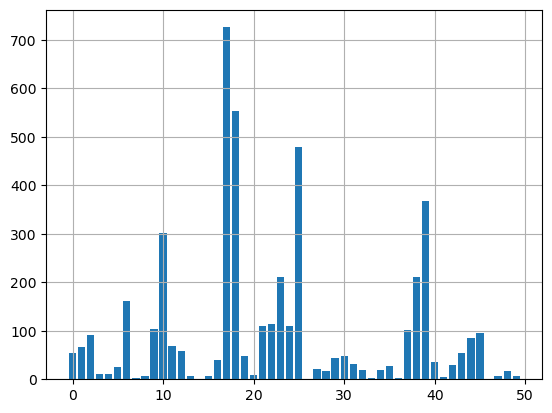

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


In [47]:
# item 수가 너무 많아서 시각화로 다 나타내기 힘들기 때문에 숫자로 표현
x_pos = np.arange(len(order_qt))
plt.bar(
    x_pos, 
    order_cnt,
)
plt.grid()
plt.show()
print(order_cnt)


In [48]:
# 분석은 돈이다!

In [49]:
# 돈을 분석해보려면 전처리해야함
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


## 데이터 전처리

### item_price 피처 전처리

- 원인
    - 가격을 나타내는 숫자 앞에 $ 기호가 붙어 있음

In [70]:
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [76]:
chipo["item_price"] = chipo["item_price"].str.replace("$","").astype(float)

In [83]:
# 여러가지 방법이있을것임
# 슬라이싱 chipo["item_price"].str[1:].astype(float)
# 람다 chipo["item_price"].map(lambda x : float(x[1:]))

In [81]:
chipo.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [84]:
chipo.describe()

,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


## 추가 데이터 탐색

In [86]:
# 객단가 : 한명의 고객이 얼마나 사먹는지
# 를 따져야한다...
# 손님너무많으면 손님 받지마세요 => 알바고용을 더하다간... 남는게 없어...

### 주문당 평균 계산금액

In [141]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,total_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


In [135]:
# 한 손님(한팀) 이 왔을때 총 쓴 금액
order = chipo.groupby("order_id")["item_price"].sum()

In [144]:
# 이것이 객단가 ( 고객이 평균적으로 쓰는것임 )
order_mean = order.mean()

- 한명의 손님이 19달러정도 쓰는구나 라고 예상함

In [143]:
# 예시로 설명한것들은 도메인지식을 위함임
# 객단가를 구하는데 왜 시리즈가 나오느냐!!!

### 한 주문에 20달러 이상 지불한 주문

In [153]:
order = chipo.groupby("order_id")["item_price"].sum()

In [164]:
upper_20 = order[order >= 20]

In [165]:
# 차근차근

In [166]:
upper_20

order_id
4       21.00
18      24.90
20      36.20
21      23.36
26      20.50
        ...  
1827    32.95
1829    24.25
1830    23.00
1833    23.50
1834    28.75
Name: item_price, Length: 589, dtype: float64

In [168]:
upper_20.shape # 평균보다 많은 사람들이 20달러 이상쓰는구나

(589,)

In [169]:
# 각 메뉴가 얼마인지
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,total_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


### 각 아이템의 가격 구하기
- 현재 아이템 데이터는 없기 때문에 아이템 가격을 위해서는 주문 데이터에서 유추하는 방법밖에 없음

- 1. 동일한 아이템을 1개만 구매한 주문을 선별
  2. item _name 을 기준으로 그룹화한 뒤 각 그룹별 최적가를 계산
  3. item_price 기준으로 정렬

In [176]:
key = chipo["item_name"].unique()
key

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [182]:
# 동일한 아이템을 1개만 구매한 주문을 선별
one_item = chipo[chipo["quantity"] == 1]
one_item.head()

,order_id,quantity,item_name,choice_description,item_price,total_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98


In [192]:
# item _name 을 기준으로 그룹화한 뒤 각 그룹별 최적가를 계산
item_price = one_item.groupby("item_name").min()

In [195]:
# item_price 기준으로 정렬
item_price.sort_values("item_price", ascending = False)

,order_id,quantity,choice_description,item_price,total_price
item_name,,,,,
Carnitas Salad Bowl,468,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39,9.39
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39,9.39
Steak Salad Bowl,250,1,"[Fresh Tomato Salsa, Lettuce]",9.39,9.39
Carnitas Crispy Tacos,230,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99,8.99
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99,8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99,8.99
Carnitas Bowl,17,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99,8.99
Carnitas Soft Tacos,103,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99,8.99
Steak Soft Tacos,4,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99,8.99


In [197]:
# 몽골에서는 소고기 무국이 삼시세끼로 나온다
# 다 다른 무국이라고 한다

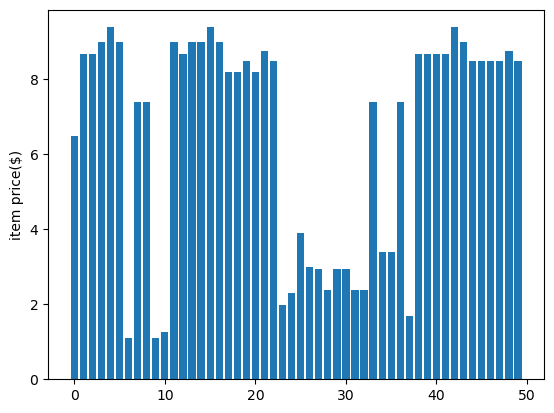

In [203]:
# 가격을 시각화

x_pos = np.arange(len(item_price))

plt.bar(
    x_pos,
    item_price["item_price"]
)

plt.ylabel("item price($)")
plt.show()

#print(item_price)

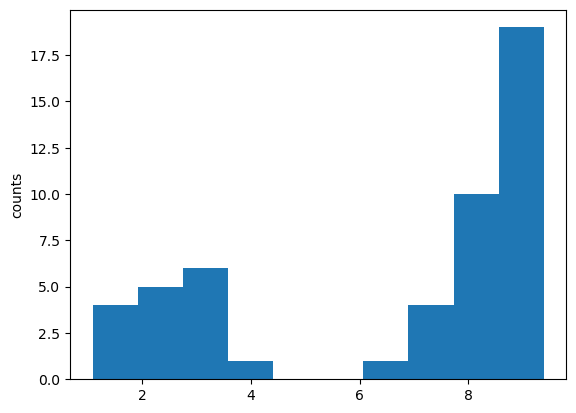

In [205]:
# 아이템 가격 히스토그램 ( 분포를 알기 쉽게하기 위해)
plt.hist(item_price["item_price"])
plt.ylabel("counts")
plt.show() # 4 ~ 5달러 사이의 가격대의 상품이 없구나!

### Chicken Bowl 을 2개 이상 주문한 고객들의 Chicken Bowl 메뉴에 대한 총 주문 수량 구하기

In [225]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [227]:
chicken_df = chipo[(chipo["item_name"] == "Chicken Bowl")]
chicken_df.head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49


In [228]:
group_chicken = chicken_df.groupby("order_id")["quantity"].sum()
group_chicken

order_id
2       2
3       1
7       1
10      1
13      1
       ..
1824    2
1825    3
1826    1
1827    1
1828    1
Name: quantity, Length: 615, dtype: int64

In [230]:
# 치킨볼 2개이상사먹은 사람의 총 구매횟수
chicken_sum = group_chicken[group_chicken>= 2].sum()
chicken_sum

np.int64(260)

In [ ]:
# 시각화